# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


c:\Users\Juhana\scoop\apps\pyenv\current\pyenv-win\versions\3.11.0rc2\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   1.0.1 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [4]:
df = pd.read_csv('raw-polls.csv')
df.sample(30)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
2719,24845,89307,1357,2006,2006_Gov-G_TN,TN,Gov-G,Gov-G,SurveyUSA,325,IVR,NaN,10/23/06,780.0,Phil Bredesen,12761,DEM,66.0,Jim Bryson,12758,REP,29.0,NaN,37.0,11/7/06,68.60,29.74,38.86,-1.86,1.0,NaN
4570,16565,21462,716,2008,2008_Pres-G_IA,IA,Pres-G,Pres-G,Research 2000,281,Live Phone,NaN,10/28/08,600.0,Barack Obama,41,DEM,53.0,John McCain,44,REP,39.0,NaN,14.0,11/4/08,53.93,44.39,9.53,4.47,1.0,NaN
2345,4466,5795,764,2004,2004_Pres-G_FL,FL,Pres-G,Pres-G,Rasmussen Reports/Pulse Opinion Research,277,IVR,NaN,10/28/04,600.0,John Kerry,157,DEM,47.0,George W. Bush,182,REP,50.0,NaN,-3.0,11/2/04,47.09,52.10,-5.01,2.01,1.0,NaN
4744,16506,25269,1561,2008,2008_Sen-G_MN,MN,Sen-G,Sen-G,Princeton Survey Research Associates Internati...,258,Live Phone,NaN,10/30/08,933.0,Al Franken,2679,DEM,42.0,Norm Coleman,2680,REP,38.0,15.0,4.0,11/4/08,41.99,41.98,0.01,3.99,1.0,for Minneapolis Star Tribune
4803,63822,117516,739,2008,2008_Pres-G_OH,OH,Pres-G,Pres-G,Zogby Interactive/JZ Analytics,395,Online,NaN,11/1/08,605.0,Barack Obama,41,DEM,50.2,John McCain,44,REP,43.9,NaN,6.3,11/4/08,51.50,46.91,4.59,1.71,1.0,NaN
2329,64064,117891,3288,2004,2004_House-G_IL-8,IL-8,House-G,House-G,GQR Research (GQRR),126,Live Phone,D,10/27/04,500.0,Melissa L. Bean,13939,DEM,46.0,Philip Crane,13940,REP,48.0,NaN,-2.0,11/2/04,51.70,48.30,3.40,-5.40,0.0,for unspecified Democratic sponsor
7282,34347,48323,5575,2014,2014_House-G_NH-2,NH-2,House-G,House-G,University of New Hampshire,357,Live Phone,NaN,10/24/14,294.0,Annie Kuster,5796,DEM,53.0,Marilinda Garcia,5791,REP,30.0,NaN,23.0,11/4/14,54.87,44.87,10.00,13.00,1.0,for WMUR
1989,4631,26670,1622,2004,2004_Sen-G_GA,GA,Sen-G,Sen-G,Strategic Vision LLC,320,Live Phone,NaN,10/18/04,801.0,Denise Majette,3174,DEM,41.0,Johnny Isakson,3173,REP,55.0,1.0,-14.0,11/2/04,39.98,57.88,-17.90,3.90,1.0,NaN
9512,56829,91590,96,2018,2018_Sen-G_AZ,AZ,Sen-G,Sen-G,Harris Insights & Analytics,133,Online,NaN,11/4/18,600.0,Kyrsten Sinema,12409,DEM,48.6,Martha McSally,12410,REP,44.0,NaN,4.6,11/6/18,49.96,47.61,2.34,2.26,1.0,for Auto Alliance
5487,51860,81945,4665,2010,2010_House-G_MI-7,MI-7,House-G,House-G,Marketing Resource Group (MRG),193,Live Phone,NaN,10/25/10,400.0,Mark Schauer,10828,DEM,50.0,Tim Walberg,10829,REP,43.0,NaN,7.0,11/2/10,45.38,50.16,-4.78,11.78,0.0,NaN


The cell below loads the same data in R:

In [5]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 x 31
   poll_id questio~1 race_id  year race  locat~2 type_~3 type_~4 polls~5 polls~6
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998~ NY      Gov-G   Gov-G   Blum &~      32
 2   26255     87926    1456  1998 1998~ OH      Gov-G   Gov-G   Univer~     346
 3   26026     31266    1736  1998 1998~ NV      Sen-G   Sen-G   FM3 Re~      91
 4   26013     31253    1738  1998 1998~ NY      Sen-G   Sen-G   Blum &~      32
 5   63632    117103    1738  1998 1998~ NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

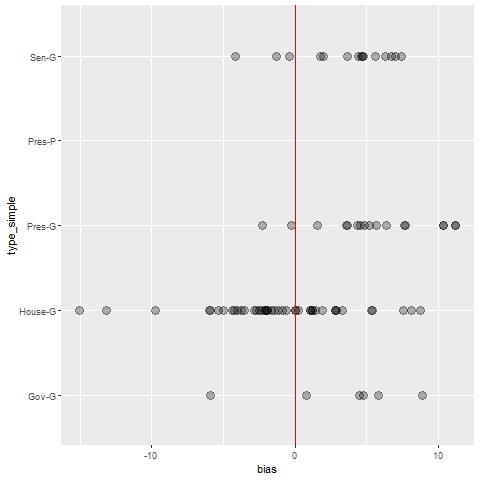

In [35]:
%%R

pollster_df <- df %>% filter(pollster=='Siena College/The New York Times Upshot')

ggplot(pollster_df) +
    aes(x=bias, y=type_simple) +
    geom_point(size=4, alpha=.3) +
    geom_vline(aes(xintercept=0), color='red')

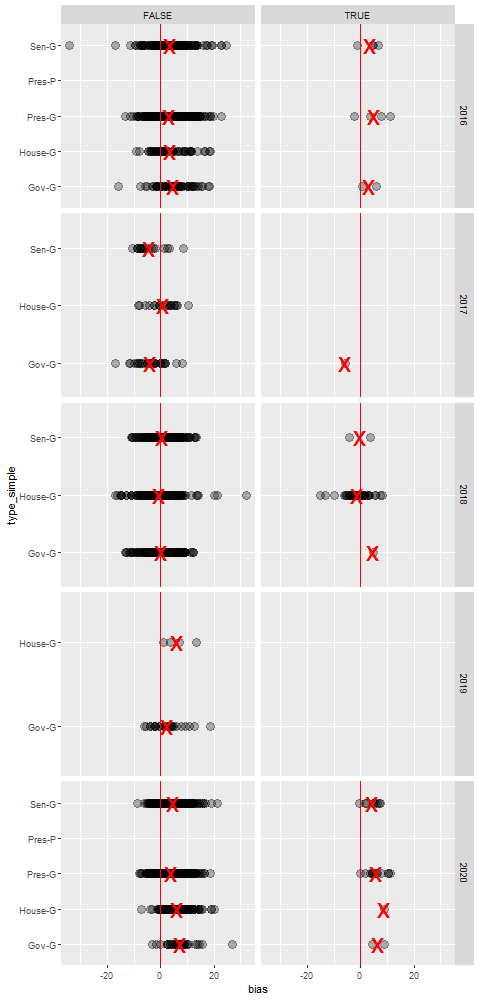

In [55]:
%%R -h 1000

#pollster_df <- df %>% filter(pollster=='Siena College/The New York Times Upshot')

plot_type_1 <- function(pollster_to_plot) {

pollster_df <- df %>% filter(pollster=='my_pollster')
ggplot(df %>% filter(year>=2016)) +
    aes(x=bias, y=type_simple) +
    geom_point(size=4, alpha=.3) +
    stat_summary(fun.y=mean, geom='point', shape='x', size=10, color='red', alpha=1) +
    geom_vline(aes(xintercept=0), color='red') +
    #facet_wrap(~pollster=='Siena College/The New York Times Upshot')
    facet_grid(year~pollster=='Siena College/The New York Times Upshot', scales='free_y')
}

plot_type_1('Siena College/The New York Times Upshot')

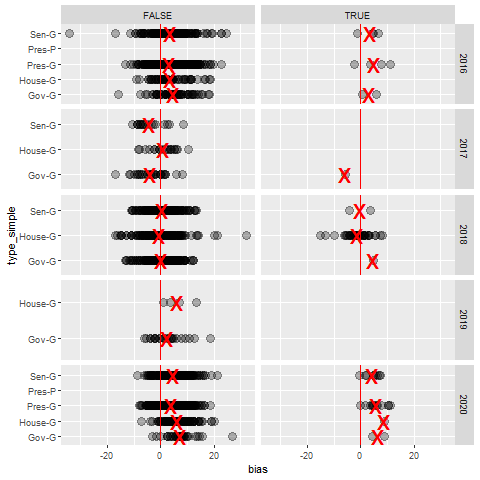

In [59]:
%%R

pollsters_I_want <- c('Siena College/The New York Times Upshot', 'Jayhawk Consulting Services', "Brown University", 'Fox News/Beacon Research/Shaw & Co. Research')
plot_type_1(pollsters_I_want)

In [ ]:
nyt.bias.mean()

1.4229268292682928

In [ ]:
test_col = df.bias.abs()

In [ ]:
df['abs_bias'] = test_col

In [ ]:
nyt = df[df.pollster == "Siena College/The New York Times Upshot"]

In [ ]:
nyt.abs_bias.mean()

4.3619512195121946

In [ ]:
df.abs_bias.mean()

4.911728241160472

In [ ]:
df.groupby('type_simple').bias.mean()

type_simple
Gov-G      0.506251
House-G    1.073761
Pres-G     0.879480
Pres-P          NaN
Sen-G      0.132115
Name: bias, dtype: float64

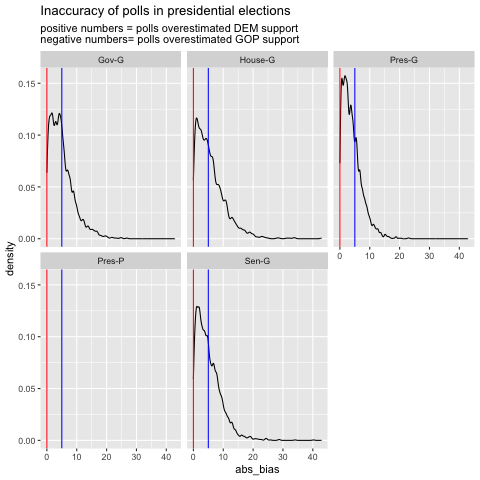

In [ ]:
%%R -i df

# a basic histogram
ggplot(df) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

In [ ]:
nyt.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.101667
House-G    3.667273
Pres-G     5.933529
Pres-P          NaN
Sen-G      4.322667
Name: abs_bias, dtype: float64

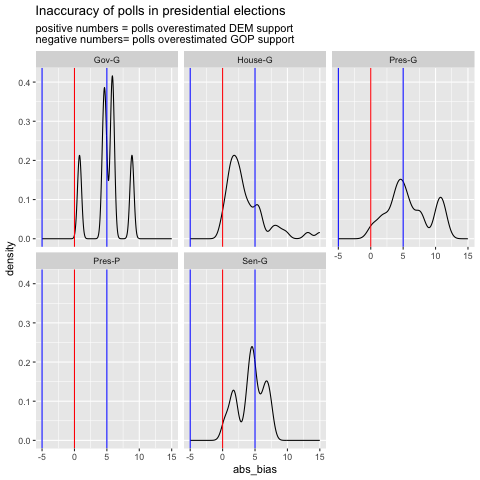

In [ ]:
%%R -i nyt

# a basic histogram
ggplot(nyt) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

In [ ]:
print("Generally fine, lean democrat by about 5% in most election types. Slightly worse than the aggregate.")

Generally fine, lean democrat by about 5% in most election types. Slightly worse than the aggregate.


👉 **Jayhawk Consulting**

In [ ]:
df[df.pollster == "Jayhawk Consulting Services"]

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment,abs_bias
7325,36081,49015,5495,2014,2014_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/26/14,400.0,James E. Sherow,5342,DEM,45.0,Tim Huelskamp,5335,REP,38.0,NaN,7.0,11/4/14,32.03,67.97,-35.94,42.94,0.0,for James E. Sherow,42.94
9146,56550,90986,330,2018,2018_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/23/18,600.0,Alan LaPolice,11713,DEM,38.0,Roger Marshall,11714,REP,42.0,NaN,-4.0,11/6/18,31.85,68.15,-36.29,32.29,1.0,for Alan LaPolice,32.29


In [ ]:
print("They just tell their clients that they're way ahead lol.")

They just tell their clients that they're way ahead lol.


👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [ ]:
fox = df[df.pollster == "Fox News/Beacon Research/Shaw & Co. Research"]

In [ ]:
len(fox)

46

In [ ]:
df.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.098776
House-G    5.830789
Pres-G     4.081582
Pres-P          NaN
Sen-G      5.154237
Name: abs_bias, dtype: float64

In [ ]:
fox.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      6.965000
House-G    3.055000
Pres-G     3.669167
Pres-P          NaN
Sen-G      5.472222
Name: abs_bias, dtype: float64

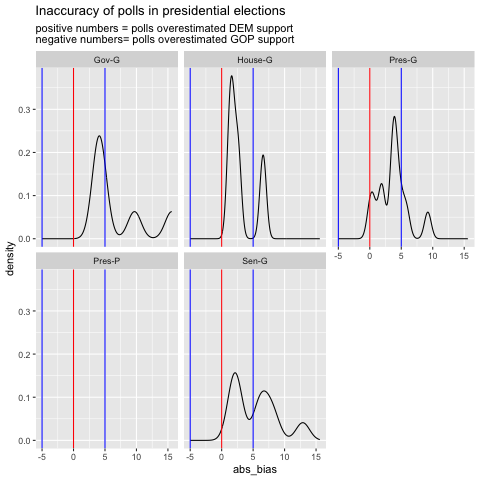

In [ ]:
%%R -i fox

# a basic histogram
ggplot(fox) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

👉 **Brown University**

👉 **American Research Group**

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

In [60]:
df['abs_bias'] = df.bias.abs()
df.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment,abs_bias
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/98,364.0,Peter Vallone,13080,DEM,26.0,George Pataki,13083,REP,57.0,9.0,-31.0,11/3/98,33.16,54.32,-21.15,-9.85,1.0,for New York Daily News | WABC-TV (New York),9.85
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,Live Phone,NaN,10/13/98,540.0,Lee Fisher,13085,DEM,37.0,Bob Taft,13086,REP,52.0,NaN,-15.0,11/3/98,44.69,50.05,-5.36,-9.64,1.0,NaN,9.64
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,Live Phone,D,10/13/98,488.0,Harry Reid,3964,DEM,49.0,John Ensign,3965,REP,44.0,NaN,5.0,11/3/98,47.86,47.77,0.09,4.91,1.0,for unspecified Democratic sponsor,4.91
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/98,364.0,Charles E. Schumer,3966,DEM,44.0,Alfonse M. D'Amato,3967,REP,52.0,NaN,-8.0,11/3/98,54.62,44.08,10.54,-18.54,0.0,for New York Daily News | WABC-TV (New York),18.54
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,Live Phone,D,10/13/98,902.0,Charles E. Schumer,3966,DEM,46.0,Alfonse M. D'Amato,3967,REP,42.0,NaN,4.0,11/3/98,54.62,44.08,10.54,-6.54,1.0,for Charles E. Schumer,6.54


In [20]:
df_rank = df.groupby('pollster').abs_bias.mean().reset_index()
df_rank


,pollster,abs_bias
0,1892 Polling,0.610000
1,20/20 Insight,3.498000
2,A&A Research,10.040000
3,ABC News/The Washington Post,2.977273
4,ALG Research,6.311000
...,...,...
488,Zimmerman & Associates/Marketing Intelligence,4.673333
489,Zogby Interactive/JZ Analytics,5.191921
490,brilliant corners Research & Strategies,12.270000
491,ccAdvertising,7.363939


In [32]:
df_rank.sort_values(by='abs_bias', ascending=False)
df2=df_rank.dropna(subset=['abs_bias']).reset_index(drop=True)
df2.sort_values(by='abs_bias')
df_final=df2.sort_values(by='abs_bias').reset_index(drop=True)
df_final

,pollster,abs_bias
0,Winthrop University,0.180
1,Amber Integrated,0.380
2,1892 Polling,0.610
3,Ogden & Fry,0.650
4,Mercyhurst University,0.740
...,...,...
444,Bainbridge Media Group,21.180
445,Dane & Associates,21.300
446,Massie & Associates,23.980
447,Riggs Research Services,33.650


👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
